In [34]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid
from Models.clustering import NCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [36]:
# bandwidth = 0.01
# grid_x    = grid(bandwidth, start=-5, end=15)
# mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])

# # Chọn độ rộng cố định cho Uniform
# width = 2.0

# # Tính a và b sao cho mean = mu
# a_list = mu - width / 2
# b_list = mu + width / 2

# # Gọi lại hàm generateUniform
# F_data = generateUniform(a_list, b_list, grid_x)

In [37]:
bandwidth = 0.01
grid_x    = grid(bandwidth, start=-5, end=20)
mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])
sig       = np.ones_like(mu)
F_data    = generateGauss(mu, sig, grid_x)

In [38]:
cluster=NCF.Model(
   grid_x=grid_x,
    num_clusters=3,
    max_iterations= 100,
    tolerance= 1e-4,
    distance_metric= 'W2',
    verbose=True,
)
cluster.fit(F_data)
T, I, F, Theta, J = cluster.get_results()


[1] ΔC=1.16e+00, Obj=0.703039
[2] ΔC=5.23e-01, Obj=0.744666
[3] ΔC=3.33e-01, Obj=0.774703
[4] ΔC=2.29e-01, Obj=0.789425
[5] ΔC=1.60e-01, Obj=0.797271
[6] ΔC=1.11e-01, Obj=0.802313
[7] ΔC=7.63e-02, Obj=0.806101
[8] ΔC=5.26e-02, Obj=0.809046
[9] ΔC=3.62e-02, Obj=0.811318
[10] ΔC=2.49e-02, Obj=0.813037
[11] ΔC=1.72e-02, Obj=0.814316
[12] ΔC=1.19e-02, Obj=0.815255
[13] ΔC=8.18e-03, Obj=0.815936
[14] ΔC=5.65e-03, Obj=0.816427
[15] ΔC=3.91e-03, Obj=0.816779
[16] ΔC=2.70e-03, Obj=0.817029
[17] ΔC=1.87e-03, Obj=0.817207
[18] ΔC=1.29e-03, Obj=0.817333
[19] ΔC=8.94e-04, Obj=0.817422
[20] ΔC=6.18e-04, Obj=0.817484
[21] ΔC=4.28e-04, Obj=0.817528
[22] ΔC=2.96e-04, Obj=0.817558
[23] ΔC=2.05e-04, Obj=0.817580
[24] ΔC=1.41e-04, Obj=0.817595
[25] ΔC=9.78e-05, Obj=0.817605


<Figure size 3000x1500 with 0 Axes>

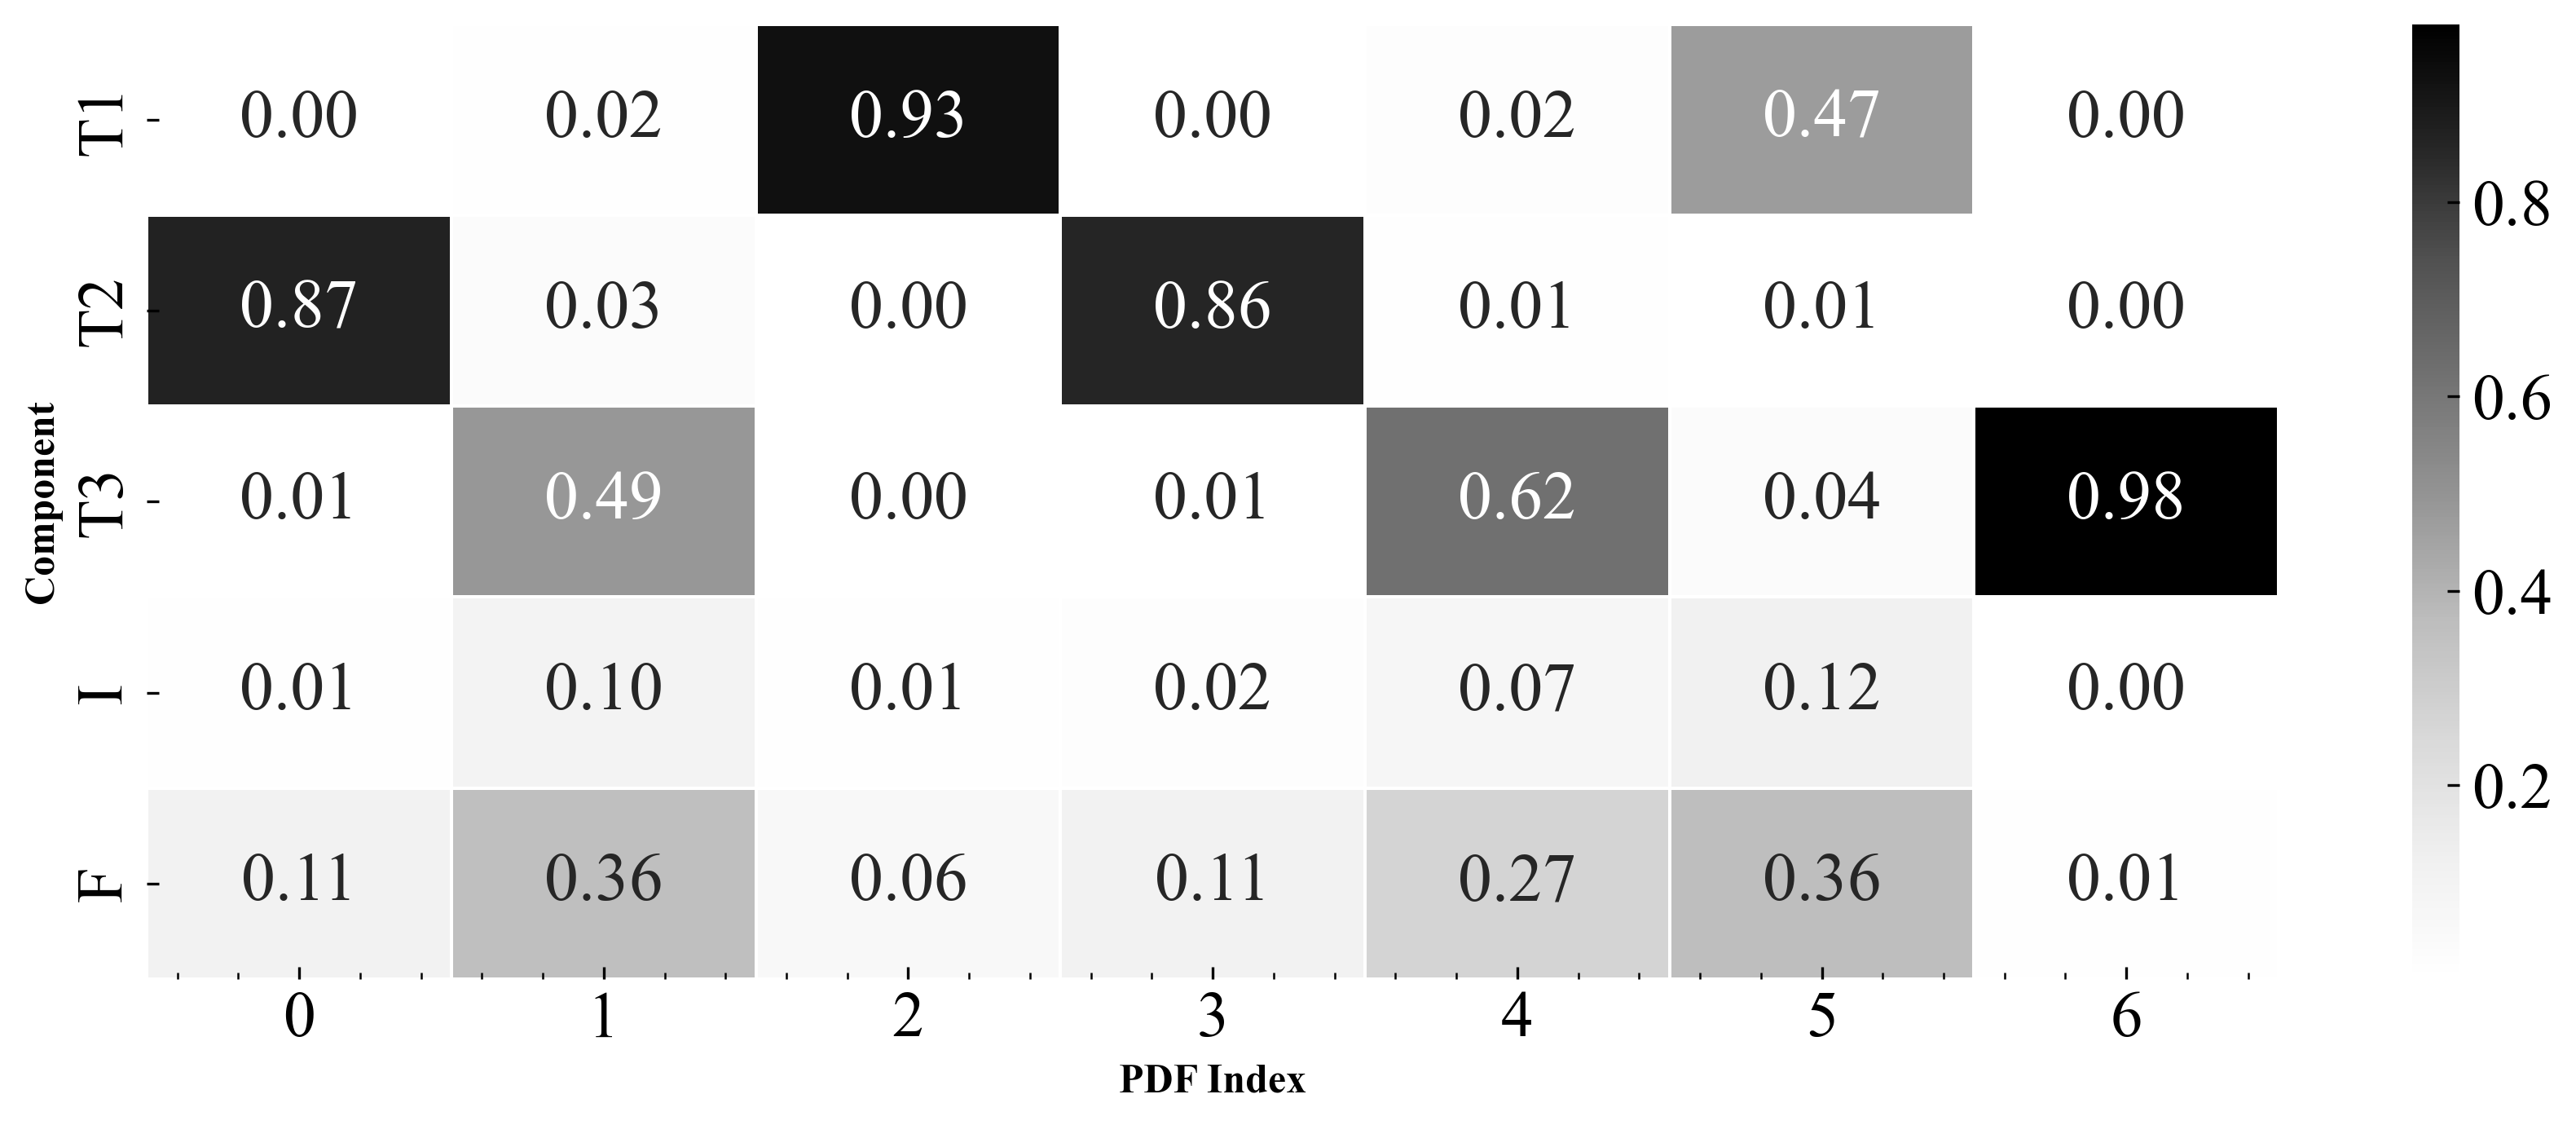

In [39]:
# plotHeatmap_U(U)
plt.figure(figsize=(10, 5))
temp(fontsize=20)


"""
Vẽ heatmap gồm 3 phần: T (membership), I (indeterminacy), F (hesitation).

- T: shape (num_pdfs, num_clusters)
- I, F: shape (num_pdfs,)
"""

T = T  # (num_clusters, num_pdfs)
I = I[None, :]  # (1, num_pdfs)
F = F[None, :]  # (1, num_pdfs)

# Ghép lại thành ma trận tổng thể
data_all = np.concatenate([T, I, F], axis=0)  # shape: (num_clusters+2, num_pdfs)

# Nhãn cho trục y
y_labels = [rf"T{j+1}" for j in range(T.shape[0])] + ["I", "F"]

# Vẽ
plt.figure(figsize=(12, 5))
sns.heatmap(
	data_all,
	annot=True,
	fmt=".2f",
	cmap='Greys',
	cbar=True,
	linewidths=0.5,
	linecolor='white',
	xticklabels=[f"{i}" for i in range(T.shape[1])],
	yticklabels=y_labels
)

plt.xlabel("PDF Index", fontsize=12)
plt.ylabel("Component", fontsize=12)
plt.tight_layout()
plt.show()

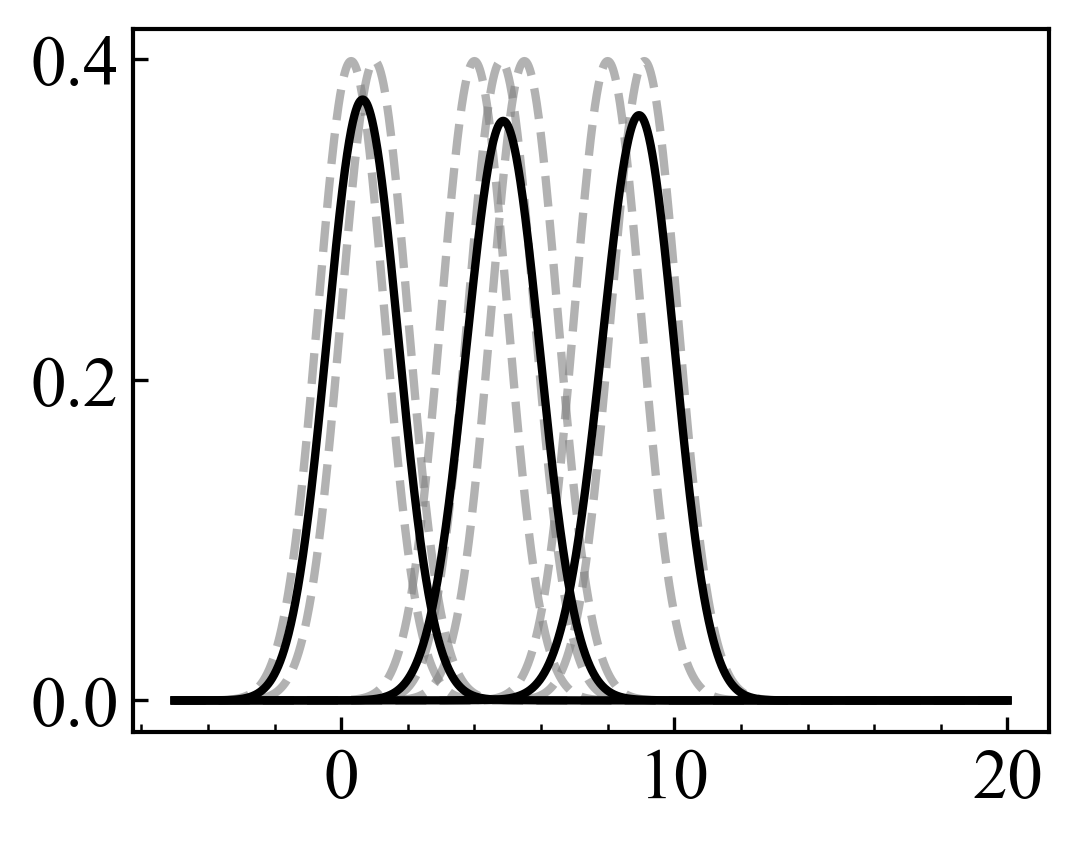

In [40]:
# plotPDF_Theta(grid_x, F_data, theta=Theta)
plt.figure()
temp(fontsize=18, w=12, h=8, u='centimeters')

# pdfs
for i in range(cluster.num_pdfs):
	plt.plot(grid_x, F_data[i, :], lw=2, color='gray', linestyle='--', alpha=0.6)

# prototype
for j in range(cluster.num_clusters):
	plt.plot(grid_x, Theta[j, :], lw=2, linestyle='-', color='black')

plt.tight_layout()

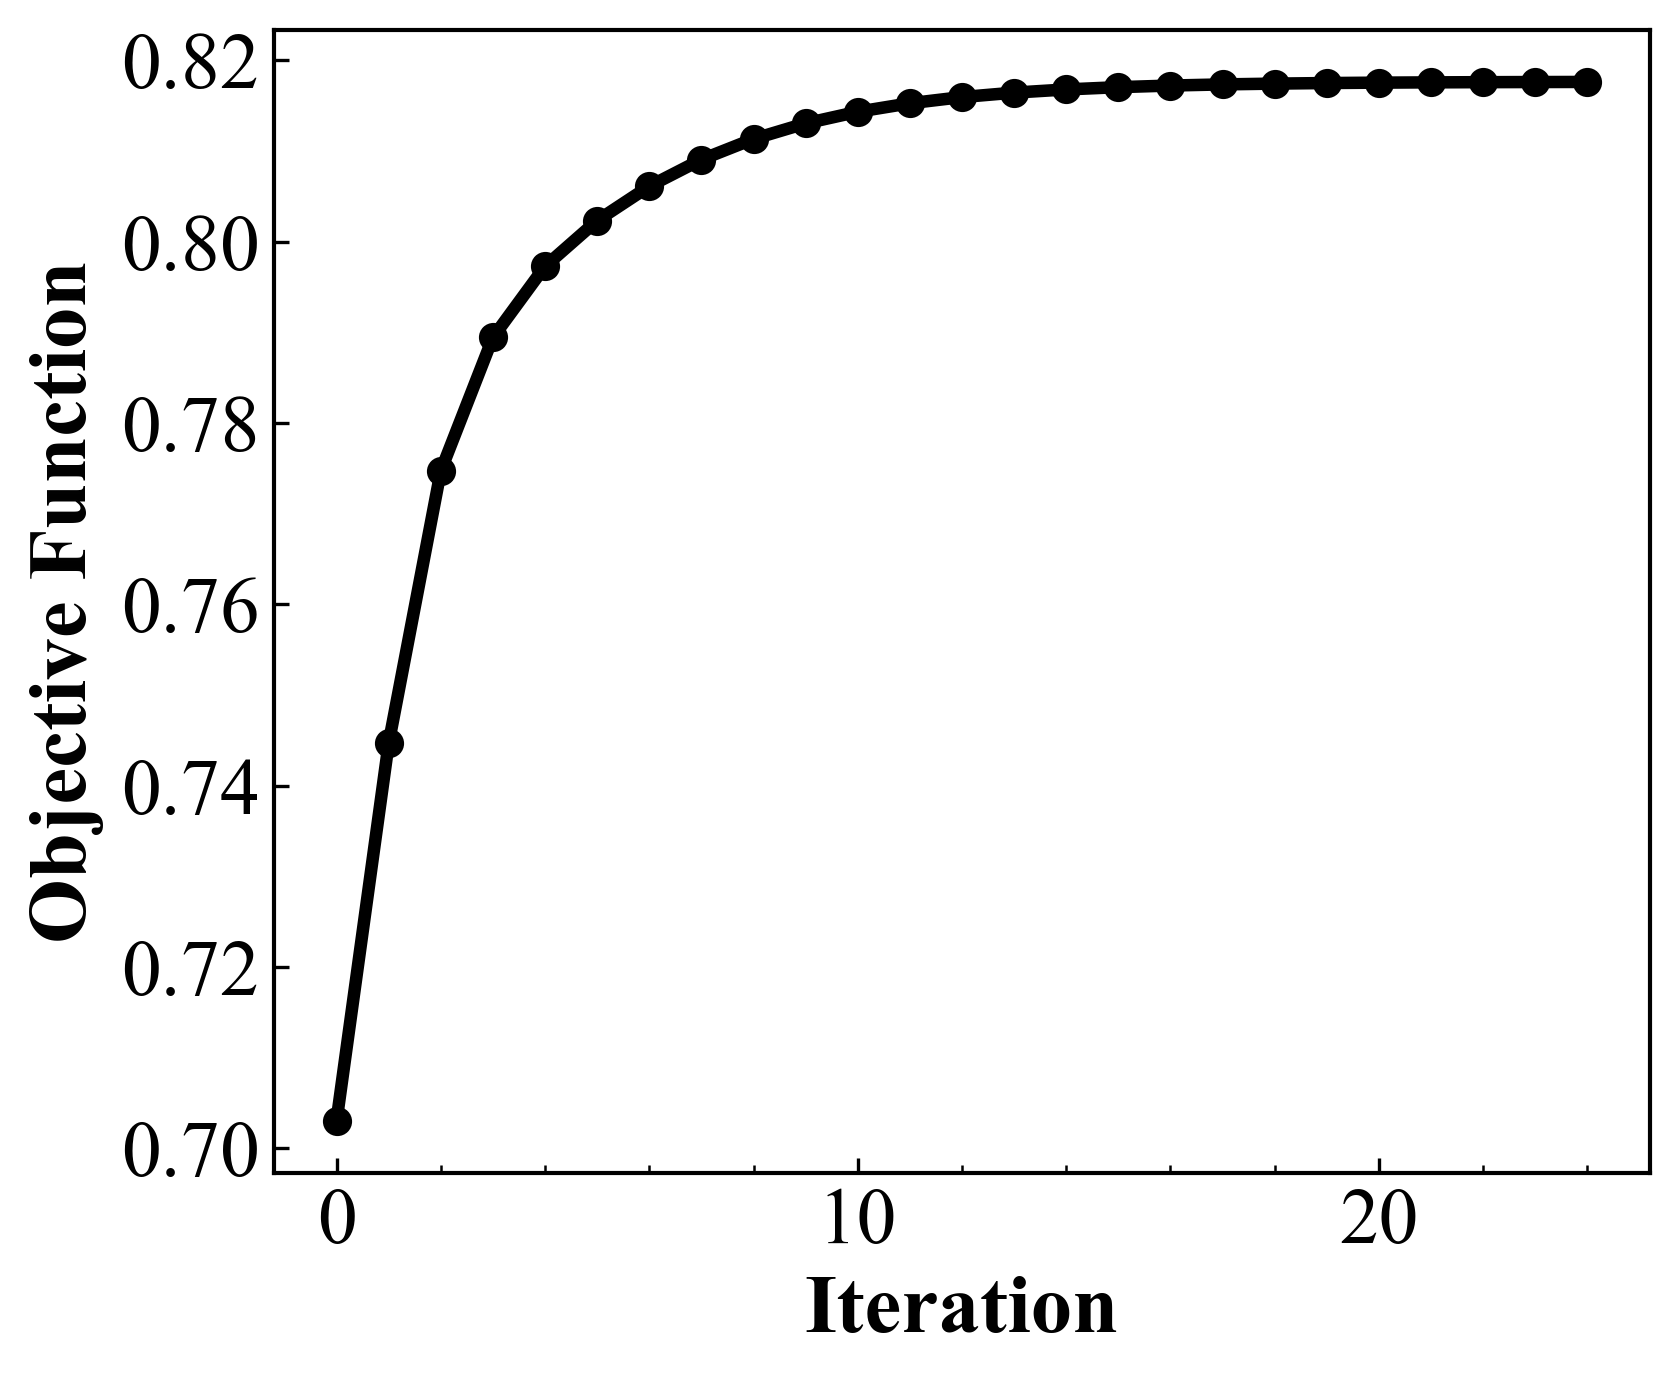

In [41]:
# plot_OF(J)
plt.figure(figsize=(6, 5))
temp(fontsize=20)

plt.plot(J, lw = 3,color = 'black', marker='o')
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.tight_layout()

In [42]:
# from utils.vali import CVI

# evaluator = CVI(distance_metric='L2',bandwidth=bandwidth, grid=grid_x)


# sil = evaluator.silhouette_index(F_data, labels)
# dunn = evaluator.dunn_index(F_data, labels)
# dbi = evaluator.davies_bouldin_index(F_data, labels)

# print(f"Silhouette = {sil:.4f}, Dunn = {dunn:.4f}, DBI = {dbi:.4f}")

In [43]:
# sil_values = plot_silhouette_values(F_data, labels,
#                                     distance_metric='L2',
#                                     bandwidth=bandwidth,
#                                     grid=grid_x)
# print("Silhouette fj:", sil_values)

In [44]:
# num_clusters_range = range(2, 8)
# silhouette_scores, dunn_scores, dbi_scores = [], [], []

# for k in num_clusters_range:
# 	cluster = FCF.Model(
# 	grid_x=grid_x,
# 	num_clusters=k,
# 	fuzziness=2,
# 	max_iterations=100,
# 	tolerance=1e-5,
# 	centroid_mode="frechet",
# 	distance_metric='W2',
# 	verbose=False
# 	)
# 	cluster.fit(F_data)
# 	labels = cluster.get_hard_assignments()
# 	evaluator = CVI(distance_metric='W2', bandwidth=bandwidth, grid=grid_x)

# 	sil = evaluator.silhouette_index(F_data, labels)
# 	dunn = evaluator.dunn_index(F_data, labels)
# 	dbi = evaluator.davies_bouldin_index(F_data, labels)

# 	silhouette_scores.append(sil)
# 	dunn_scores.append(dunn)
# 	dbi_scores.append(dbi)

# plot_CVI_with_k(num_clusters_range, silhouette_scores, dunn_scores, dbi_scores)